# Contraceptive Method Choice Data Set
https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

Data Set Information:

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.


Attribute Information:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

### Import the library with files and all predefine functions

Import data from googleDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/OSDA2022/LazyFCA")

Mounted at /content/drive


Import libraries

In [2]:
import lazy_pipeline as lpipe
import pandas as pd

Check library versions

In [3]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.8.16
1.3.5
1.0.2


Run seamlessly on 
* python = 3.9.13, 
* pandas = 1.5.1
* scikit-learn = 1.1.3

### Prepare the data

##### Parsing from file

In [4]:
names_of_data_columns = ['w_age', 'w_edu', 'h_edu', 'num_child' , 'w_relig', 'w_work', 'h_occup', 'live_ind', 'med_expos', 'contr']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OSDA2022/LazyFCA/cmc.data', header=None, names = names_of_data_columns)
print('Shape of dataframe =', df.shape)
df.head()

Shape of dataframe = (1473, 10)


,w_age,w_edu,h_edu,num_child,w_relig,w_work,h_occup,live_ind,med_expos,contr
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


##### Binarisation logic

Bool and categorical(max number of category 5) feature are alright

We can binarise contraceptive to y or n cause the mount is commensurate

In [5]:
print("no use contr", df.loc[df['contr'] == 1].shape)
print("use contr", df.loc[df['contr'] != 1].shape)

no use contr (629, 10)
use contr (844, 10)


Number of children: 0, 1-2, 3-4, 5-

0 child = 97
1 child = 276
2 child = 276
3 child = 259
4 child = 197
5 child = 135
6 child = 92
7 child = 49
8 child = 47
9 child = 16
10 child = 11


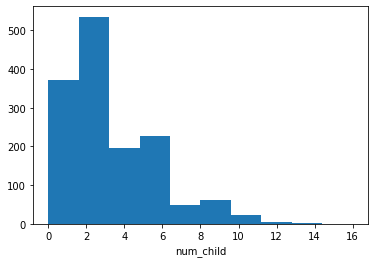

In [32]:
for i in range(0,11):
  print(i,'child =', df.loc[df['num_child'] == i].shape[0])
plt.hist(df['num_child'])
plt.xlabel("num_child")
plt.show() 

Woman Age: -21, 22-30, 31-

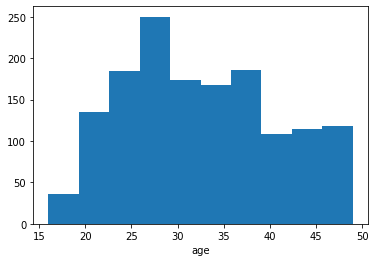

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df['w_age'])
plt.xlabel("age")
plt.show() 

##### Binarize data

In [8]:
name_numerical = ['w_age', 'num_child']
name_binary = ['w_relig', 'w_work', 'med_expos']
name_class = ['contr']

###### Categorical atributes

In [9]:
category_attr_data = lpipe.binarize_X(df.drop(name_numerical+name_binary+name_class, axis=1))
category_attr_data.head()

,w_edu: 1,w_edu: 2,w_edu: 3,w_edu: 4,h_edu: 1,h_edu: 2,h_edu: 3,h_edu: 4,h_occup: 1,h_occup: 2,h_occup: 3,h_occup: 4,live_ind: 1,live_ind: 2,live_ind: 3,live_ind: 4
0,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
2,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True
3,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
4,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False


###### Binary attr

In [10]:
binary_attr_data = df[name_binary].astype('bool')
binary_attr_data.head()

,w_relig,w_work,med_expos
0,True,True,False
1,True,True,False
2,True,True,False
3,True,True,False
4,True,True,False


###### Numerical attr

In [11]:
# 0, 1-2, 3-4, 5-
#-21, 22-30, 31-
numerical_attr_data = df[name_numerical]
numerical_attr_data["w_age: ..-21"] = (numerical_attr_data["w_age"] <= 21).astype(bool)
numerical_attr_data["w_age: 22-30"] = (numerical_attr_data["w_age"] >= 22).astype(bool) & (numerical_attr_data["w_age"] <= 30).astype(bool)
numerical_attr_data["w_age: 31-.."] = (numerical_attr_data["w_age"] >= 31).astype(bool)
numerical_attr_data["num_child: 0"] = (numerical_attr_data["num_child"] == 0).astype(bool) 
numerical_attr_data["num_child: 1-2"] = (numerical_attr_data["num_child"] >= 1).astype(bool) & (numerical_attr_data["num_child"] <= 2).astype(bool)
numerical_attr_data["num_child: 3-4"] = (numerical_attr_data["num_child"] >= 3).astype(bool) & (numerical_attr_data["num_child"] <= 4).astype(bool)
numerical_attr_data["num_child: 5-.."] = (numerical_attr_data["num_child"] >= 5).astype(bool)
numerical_attr_data = numerical_attr_data.drop(name_numerical, axis=1)
#X = pd.concat([binary_attr_data, category_attr_data], axis=1)
numerical_attr_data.head()

<ipython-input-11-eb206555e06c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_attr_data["w_age: ..-21"] = (numerical_attr_data["w_age"] <= 21).astype(bool)
<ipython-input-11-eb206555e06c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_attr_data["w_age: 22-30"] = (numerical_attr_data["w_age"] >= 22).astype(bool) & (numerical_attr_data["w_age"] <= 30).astype(bool)
<ipython-input-11-eb206555e06c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,w_age: ..-21,w_age: 22-30,w_age: 31-..,num_child: 0,num_child: 1-2,num_child: 3-4,num_child: 5-..
0,False,True,False,False,False,True,False
1,False,False,True,False,False,False,True
2,False,False,True,False,False,False,True
3,False,False,True,False,False,False,True
4,False,False,True,False,False,False,True


###### All binary attributes table

In [12]:
X = pd.concat([numerical_attr_data, binary_attr_data, category_attr_data], axis=1)
print(X.shape)
X.head()

(1473, 26)


,w_age: ..-21,w_age: 22-30,w_age: 31-..,num_child: 0,num_child: 1-2,num_child: 3-4,num_child: 5-..,w_relig,w_work,med_expos,...,h_edu: 3,h_edu: 4,h_occup: 1,h_occup: 2,h_occup: 3,h_occup: 4,live_ind: 1,live_ind: 2,live_ind: 3,live_ind: 4
0,False,True,False,False,False,True,False,True,True,False,...,True,False,False,True,False,False,False,False,True,False
1,False,False,True,False,False,False,True,True,True,False,...,True,False,False,False,True,False,False,False,False,True
2,False,False,True,False,False,False,True,True,True,False,...,True,False,False,False,True,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,True,False,False,False,True,True,True,False,...,True,False,False,False,True,False,False,True,False,False


###### Contraceptive main prediction class

In [13]:
class_data = df[name_class]
class_data["contr"] = (class_data["contr"] > 1).astype(bool)
y = class_data
print(y.shape)
y.head()

(1473, 1)


<ipython-input-13-6cff6bc8704b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data["contr"] = (class_data["contr"] > 1).astype(bool)


,contr
0,False
1,False
2,False
3,False
4,False


##### Shuffle the data

Shuffle the data to drop any initial ordering of rows. For example, if the dataset is constructed first from all positive examples and then all negative examples.

In [14]:
Z = pd.concat([X, y], axis=1)
Z.head()

,w_age: ..-21,w_age: 22-30,w_age: 31-..,num_child: 0,num_child: 1-2,num_child: 3-4,num_child: 5-..,w_relig,w_work,med_expos,...,h_edu: 4,h_occup: 1,h_occup: 2,h_occup: 3,h_occup: 4,live_ind: 1,live_ind: 2,live_ind: 3,live_ind: 4,contr
0,False,True,False,False,False,True,False,True,True,False,...,False,False,True,False,False,False,False,True,False,False
1,False,False,True,False,False,False,True,True,True,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,True,False,False,False,True,True,True,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,True,False,False,False,True,True,True,False,...,False,False,False,True,False,False,False,True,False,False
4,False,False,True,False,False,False,True,True,True,False,...,False,False,False,True,False,False,True,False,False,False


In [15]:
Z = Z.sample(frac=1, random_state=42)  # Shuffle Z
X = Z.drop(name_class, axis=1)
y = Z[name_class]

In [16]:
y

,contr
852,True
184,False
1261,True
67,False
220,False
...,...
1130,False
1294,True
860,True
1459,True


In [17]:
X

,w_age: ..-21,w_age: 22-30,w_age: 31-..,num_child: 0,num_child: 1-2,num_child: 3-4,num_child: 5-..,w_relig,w_work,med_expos,...,h_edu: 3,h_edu: 4,h_occup: 1,h_occup: 2,h_occup: 3,h_occup: 4,live_ind: 1,live_ind: 2,live_ind: 3,live_ind: 4
852,False,True,False,False,False,True,False,True,True,False,...,True,False,False,False,True,False,False,False,False,True
184,False,False,True,False,False,False,True,True,False,False,...,False,True,False,True,False,False,False,True,False,False
1261,False,True,False,False,True,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,True
67,False,True,False,False,False,True,False,True,True,False,...,True,False,False,False,True,False,True,False,False,False
220,False,True,False,False,True,False,False,True,True,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,False,False,True,False,False,False,True,True,False,False,...,False,True,False,False,True,False,False,False,False,True
1294,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
860,False,True,False,False,False,True,False,True,True,False,...,False,True,False,False,True,False,False,True,False,False
1459,False,False,True,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


##### Represent data as list of subsets

Represent data $X$ as list of subsets of attributes to better suit the theory.

In [18]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'h_edu: 3',
 'h_occup: 3',
 'live_ind: 4',
 'num_child: 3-4',
 'w_age: 22-30',
 'w_edu: 3',
 'w_relig',
 'w_work'}

And, for being consisted, convert $y$ to list too.

In [19]:
y = y['contr'].values.tolist()

Assume that at the very begining, we know the labels only for the first 20% of rows.

In [20]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(147, 1326)

Set up the test target labels $y$

In [21]:
y_test = y[n_train:]

### Make predictions

##### Make predictions and measure time required to obtain these predictions

In [22]:
import lazy_pipeline as lpipe

In [23]:
%%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 1473/1473 [00:51<00:00, 25.72it/s]

CPU times: user 51.1 s, sys: 317 ms, total: 51.4 s
Wall time: 51.6 s


In [24]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 1473/1473 [00:01<00:00, 838.05it/s]

CPU times: user 1.57 s, sys: 15 ms, total: 1.58 s
Wall time: 1.59 s


### Evaluate predictions

In [25]:
score = pd.DataFrame(columns=['Name', 'TP','FP', 'FN', 'TN', 'Accuracy', 'Precision', 'Recall', 'F1'])

Accuracy and F1

In [26]:
from sklearn.metrics import *

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
score_vals.keys()

dict_keys(['accuracy_score', 'accuracy_score_fixedtrain', 'f1_score', 'f1_score_fixedtrain'])

Table of mane estimators

In [27]:
preds = y_preds

confusion_mtrx = confusion_matrix(y_test, preds)
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds, average='binary')
recall = recall_score(y_test, preds, average='binary')
f1 = f1_score(y_test, preds, average='binary')
new_row = ['baseline clf.', confusion_mtrx[0][0], confusion_mtrx[0][1], confusion_mtrx[1][0], confusion_mtrx[1][1], acc, prec, recall, f1]
score.loc[len(score)] = new_row

preds = y_preds_fixedtrain

confusion_mtrx = confusion_matrix(y_test, preds)
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds, average='binary')
recall = recall_score(y_test, preds, average='binary')
f1 = f1_score(y_test, preds, average='binary')
new_row = ['baseline clf. (fixed train)', confusion_mtrx[0][0], confusion_mtrx[0][1], confusion_mtrx[1][0], confusion_mtrx[1][1], acc, prec, recall, f1]
score.loc[len(score)] = new_row

### Analyze results

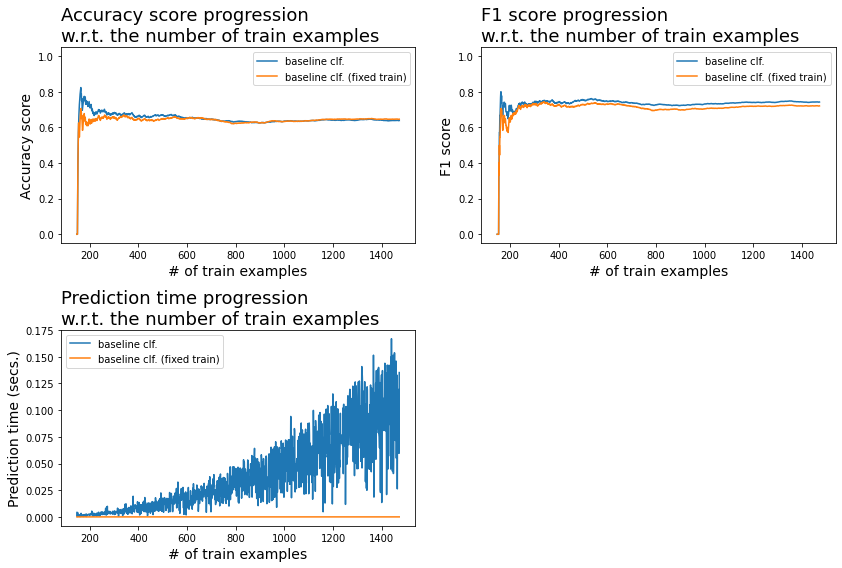

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [29]:
score

,Name,TP,FP,FN,TN,Accuracy,Precision,Recall,F1
0,baseline clf.,156,404,76,690,0.638009,0.630713,0.900783,0.741935
1,baseline clf. (fixed train),251,309,161,605,0.645551,0.661926,0.789817,0.720238
